### Random Matrix Theory

In [48]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import subprocess

In [49]:
compiled_dir = f'..{os.sep}compiled'
plot_dir = f'..{os.sep}plots'

In [50]:
program = f'{compiled_dir}{os.sep}exercise_2'

#### Hermitian Matrixx

In [52]:
output = subprocess.run([program, "--ndim", "1000", "--nsamples", "1000"])

 ndim =        1000
 nsamples =        1000
 nbins =         100
 min_val =   0.0000000000000000     
 max_val =   5.0000000000000000     


In [53]:
hist = []

with open("histogram.txt") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        hist.append(row)

In [54]:
bin_centers = [float(a[1]) for a in hist[1:]]
norm_count = [float(a[3]) for a in hist[1:]]

Confirm the area under the curve is 1.

In [55]:
sum([n * 5/100 for n in norm_count])

0.9980960849999998

Perform fit.

In [56]:
def func(x, a, b, alpha, beta):
    return a * x ** alpha * np.exp(b * x ** beta)

In [57]:
popt, pcov = curve_fit(func, bin_centers, norm_count)

In [58]:
popt

array([13.79272512, -2.82466922,  2.59653888,  1.32155578])

In [59]:
num_pts_interp = 1000
s_interp = np.linspace(bin_centers[0], bin_centers[-1], num_pts_interp)
y_fit = [func(s, *popt) for s in s_interp]

Plot the result.

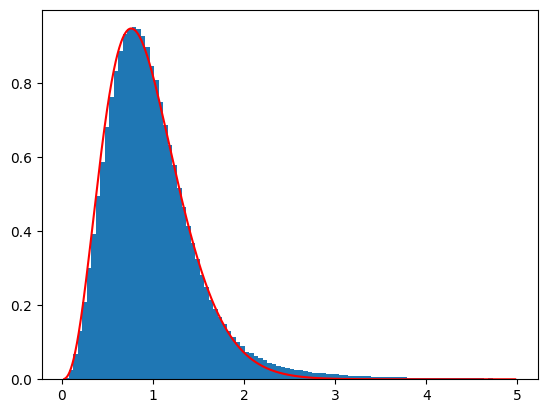

In [60]:
plt.hist(bin_centers, bins=len(norm_count), weights=norm_count)
plt.plot(s_interp, y_fit, 'r');

#### Real Diagonal Matrix

In [61]:
output_diag = subprocess.run([program, "--mat_type", "diag", "--nsamples", "1000"])

 mat_type = diag                
 ndim =          10
 nsamples =        1000
 nbins =         100
 min_val =   0.0000000000000000     
 max_val =   5.0000000000000000     


In [62]:
hist = []

with open("histogram.txt") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        hist.append(row)

In [63]:
bin_centers = [float(a[1]) for a in hist[1:]]
norm_count = [float(a[3]) for a in hist[1:]]

In [64]:
sum([n * 5/100 for n in norm_count])

0.9987777649999996

In [67]:
popt, pcov = curve_fit(func, bin_centers, norm_count)

In [68]:
s_interp = np.linspace(bin_centers[0], bin_centers[-1], num_pts_interp)
y_fit = [func(s, *popt) for s in s_interp]

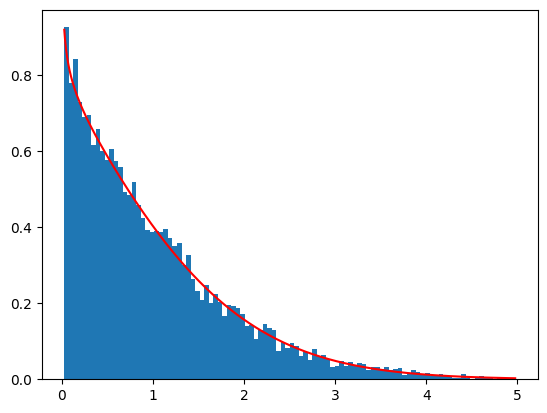

In [69]:
plt.hist(bin_centers, bins=len(norm_count), weights=norm_count)
plt.plot(s_interp, y_fit, 'r');